In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import xrft

Import data

In [2]:
user = os.getcwd().split('/')[2]

if user=='pst019':
    Mediadir= '/media/'+user+'/Backup1/'
 
datadir = Mediadir + 'data/ERA5_Clim/ERA5_data/'
year= 2013
month= 1

filedir= datadir + f'levels_500_era5_{year}_'+str(month).zfill(2)+'.nc'

ds= xr.open_dataset(filedir)
ds['plev']= ds['plev']/100


Mean: 0.08621895


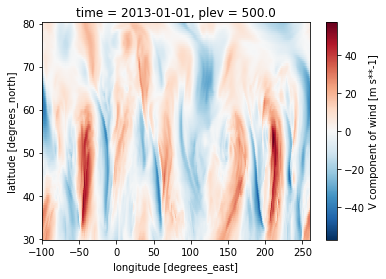

In [3]:
var= 'v'
plev= 500
time= 0

ds1= ds[var].sel(plev= plev).isel(time= 0)

ds1.plot()

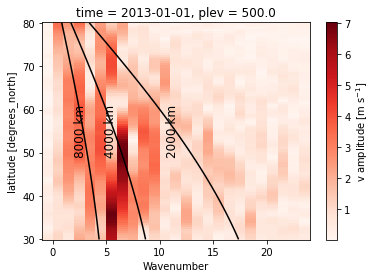

In [40]:
fds1 = xrft.fft(ds1, dim='lon', true_phase=True, true_amplitude=True)
fds1= np.abs(fds1)

n= len(fds1.freq_lon)
fds1['freq_lon'] = 360* fds1['freq_lon']

fds1= fds1.isel(freq_lon= np.arange(n//2, n) ).rename({'freq_lon': 'Wavenumber'}).rename('v amplitude [m s$^{-1}$]') #to cut the spectrum in 2
fds1*= 2/n

fds1['Wavenumber']= fds1['Wavenumber'] -0.5

fds1[:, :25].plot(cmap= 'Reds')

###make the lines with the wavelength
a= 6371E3
LatCirc = 2* np.pi * a * np.cos(np.deg2rad(fds1.lat))
Splitlist= [8000E3, 4000E3, 2000E3]

for Split in Splitlist:
    WaveSplit= LatCirc/Split   
    plt.plot(WaveSplit, WaveSplit.lat, c= 'k')
    plt.text(WaveSplit[len(WaveSplit)//2].values-.3, WaveSplit.lat[len(WaveSplit)//2], str(int(Split/1E3)) +' km',
                 fontsize=12, rotation='vertical', ha='center', va= 'center')    